# Program to Calculate the Equation of a Line and Error

In [1]:
def get_y(m,b,x):
    
    '''
    Inputs: 
        m - slope
        b - intercept
        x - x_point
    
    Outputs: 
        
        y - y_point satisfying y = m*x + b
    '''
    
    return m*x + b

In [2]:
print(get_y(1,0,1) == 1)

True


In [3]:
def calculate_error(m,b,point):
    
    '''
    Inputs:
        m - slope
        b - intercept
        point - (x,y) point
    
    Outputs:
        error - given by distance from y in point to calculated y
    '''
    
    x_point, y_point = point
    y = get_y(m,b,x_point)
    return abs(y-y_point)

In [4]:
print(calculate_error(1,0,(3,4)))

1


In [5]:
def calculate_all_error(m,b,points):
 
    '''
    Inputs: 
        m - slope
        b - intercept
        points - multiple (x,y) points
    
    Outputs: 
        total_error - the error calculated by iterating through all points
    '''

    total_error = 0
    for point in points:
        total_error += calculate_error(m,b,point)
    return total_error

In [6]:
data = [(1,1), (3,3), (5,5), (-1,-1)]
print(calculate_all_error(1,1,data))

4


# Generating Slopes and Intercepts

In [16]:
# Generating a list of slopes from -10 to 10 in steps of 0.01
all_m = [m*0.01 for m in range(-1000,1000)]
print(len(all_m))

2000


In [14]:
# Generating a list of all intercepts from -10 to 10 in steps of 0.01
all_b = [b*0.01 for b in range(-1000,1000)]
print(len(all_b))

2000


# Simple Linear Regression

In [32]:
def linear_model(data):
    
    '''
    Input: 
        data - datapoints of any length
        
    Output:
        smallest_error = Error over the datapoints
        opt_m = Optimal slope
        opt_b = Optimal intercept
    '''

    smallest_error = float('inf') # Smallest error starts at infinity
    opt_m = 0 # Initialising optimized slope
    opt_b = 0 # Initialising optimized intercept

    for m in all_m:
        for b in all_b:
            new_error = calculate_all_error(m,b,data)
            if new_error < smallest_error:
                smallest_error = new_error
                opt_m = m
                opt_b = b
    return smallest_error, opt_m, opt_b

In [36]:
data = [(1,1.7), (1.5,2.3), (2,3.1), (2.5,3.9), (3,4.3), (3.5,5.1), (4,5.5), (4.5, 5.8), (5,6.2)] # Random data
print(linear_model(data))
print('The equation of the line is: y = ' +str(round(opt_m,2))+ '*x + ' +str(round(opt_b,2)))
print('The error is: ' +str(round(smallest_error, 2)))

(1.599999999999999, 1.2, 0.7000000000000001)
The equation of the line is: y = 1.2*x + 0.7
The error is: 1.6


In [24]:
import matplotlib.pyplot as plt

In [37]:
x = [x for (x,y) in data]
print(x)
y = [y for (x,y) in data]
print(y)

[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
[1.7, 2.3, 3.1, 3.9, 4.3, 5.1, 5.5, 5.8, 6.2]


<function matplotlib.pyplot.show(*args, **kw)>

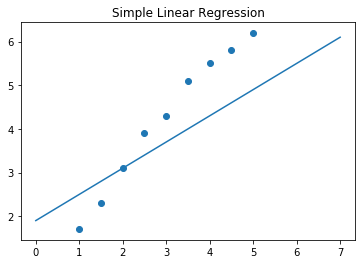

In [40]:
y_line = [opt_m*x + opt_b for x in x if x < 5]
plt.title('Simple Linear Regression')
plt.scatter(x,y)
plt.plot(y_line)
plt.show